# **INTRODUCTION**

**Market Size Analysis**
Market size analysis is really important in market research. It helps figure out how much stuff people might buy in a certain market. This helps businesses know how much people want their product, see if too many other businesses are selling the same thing, and find chances to grow.

# **Electric Vehicles Market Size Analysis**
Market size analysis is really important in market research. It helps figure out how much stuff people might buy in a certain market. This helps businesses know how much people want their product, see if too many other businesses are selling the same thing, and find chances to grow.


###**Dataset:**
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

**Created Date:**	November 10, 2020

**Last Update:** September 20, 2024

**Link:** 


The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:

- VIN (1-10): Partial Vehicle Identification Number.
- County: The county in which the vehicle is registered.
- City: The city in which the vehicle is registered.
- State: The state in which the vehicle is registered. It appears that this
- dataset may be focused on Washington (WA) state.
- Postal Code: The postal code where the vehicle is registered.
- Model Year: The year of the vehicle model.
- Make: The manufacturer of the vehicle.
- Model: The model of the vehicle.
- Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
- Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
- Electric Range: The maximum range of the vehicle on a single charge (in miles).
- Base MSRP: The Manufacturer’s Suggested Retail Price.
- Legislative District: The legislative district where the vehicle is registered.
- DOL Vehicle ID: Department of Licensing Vehicle Identification.
- Vehicle Location: Geographic coordinates of the vehicle location.
- Electric Utility: The electric utility service provider for the vehicle’s location.
- 2020 Census Tract: The census tract for the vehicle’s location.

The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion.

# Importing Librarues

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Loading Dataset

In [49]:
data = pd.read_csv('Ev_Population_US(WA).csv')

# Data Insights

In [50]:
data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [51]:
data.tail(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
205434,1N4BZ1CV2N,Chelan,Peshastin,WA,98847.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,12.0,187384494,POINT (-120.6051696 47.5510173),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
205435,1FTVW1EV0P,Snohomish,Everett,WA,98208.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,255036386,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10
205436,5YJXCDE22H,Spokane,Cheney,WA,99004.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,6.0,221631588,POINT (-117.5836098 47.4951312),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
205437,5YJ3E1EA3J,King,Vashon,WA,98070.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,34.0,336983496,POINT (-122.466938 47.429244),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
205438,7SAYGDEE7P,Spokane,Spokane,WA,99208.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,6.0,228335040,POINT (-117.4268937 47.7323627),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [53]:
data.shape

(205439, 17)

In [54]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,205436.000000,205439.000000,205431.000000,205431.000000,204997.000000,2.054390e+05,2.054360e+05
mean,98177.971870,2020.960363,52.164342,922.670532,28.970848,2.277156e+08,5.297704e+10
std,2419.037479,2.989059,88.075859,7761.753602,14.910052,7.205737e+07,1.588435e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.935324e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.382368e+08,5.303303e+10
75%,98372.000000,2023.000000,48.000000,0.000000,42.000000,2.618718e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,205436.0,9.817797e+04,2.419037e+03,1.731000e+03,9.805200e+04,9.812500e+04,9.837200e+04,9.957700e+04
Model Year,205439.0,2.020960e+03,2.989059e+00,1.997000e+03,2.019000e+03,2.022000e+03,2.023000e+03,2.025000e+03
Electric Range,205431.0,5.216434e+01,8.807586e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+01,3.370000e+02
Base MSRP,205431.0,9.226705e+02,7.761754e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,204997.0,2.897085e+01,1.491005e+01,1.000000e+00,1.700000e+01,3.300000e+01,4.200000e+01,4.900000e+01
DOL Vehicle ID,205439.0,2.277156e+08,7.205737e+07,4.469000e+03,1.935324e+08,2.382368e+08,2.618718e+08,4.792548e+08
2020 Census Tract,205436.0,5.297704e+10,1.588435e+09,1.001020e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.602100e+10


In [56]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [57]:
data.index

RangeIndex(start=0, stop=205439, step=1)

In [58]:
data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

So, this data is based on the EV population in the United States. Now, let’s clean the dataset before moving forward

In [59]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
205434    False
205435    False
205436    False
205437    False
205438    False
Length: 205439, dtype: bool

In [60]:
data.isnull()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
205435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
205436,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
205437,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         8
Base MSRP                                              8
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [62]:
data = data.dropna()

In [63]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Visualization

For the task of market size of electric vehicles analysis, we can explore the following areas:

- EV Adoption Over Time: Analyze the growth of the EV population by model year.
- Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
- EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
- Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
- Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
- Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

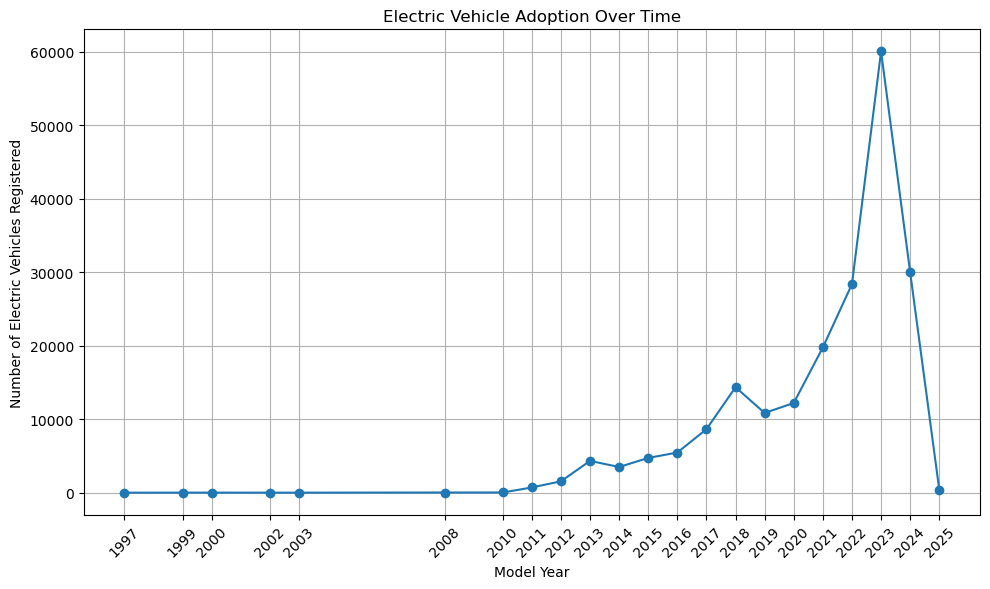

In [64]:
# Count the number of electric vehicles registered each year
counts_by_year = data['Model Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(counts_by_year.index, counts_by_year.values, marker='o', linestyle='-')
plt.title('Electric Vehicle Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles Registered')
plt.grid(True)
plt.xticks(counts_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

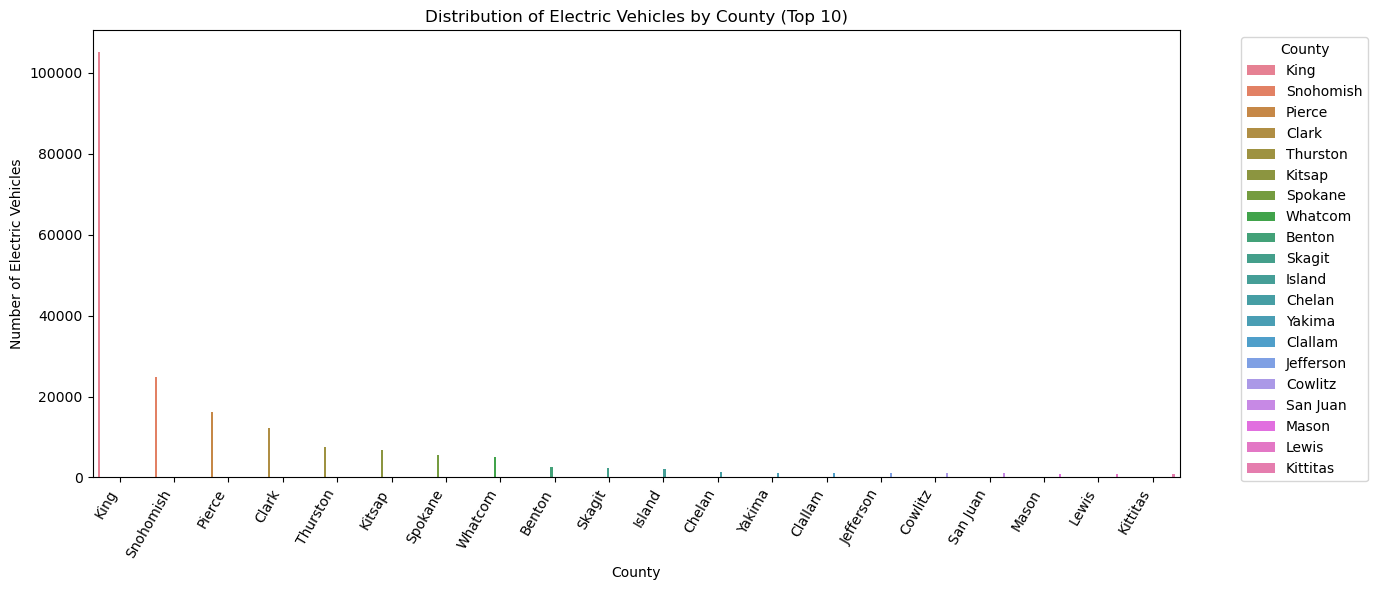

In [76]:
# Count the number of electric vehicles by county
count_by_county = data['County'].value_counts().head(20)
colors = sns.color_palette("husl", len(count_by_county))

plt.figure(figsize=(12, 6))
sns.barplot(x=count_by_county.index, y=count_by_county.values, hue=count_by_county.index, palette=colors)
plt.title('Distribution of Electric Vehicles by County (Top 10)')
plt.xlabel('County')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

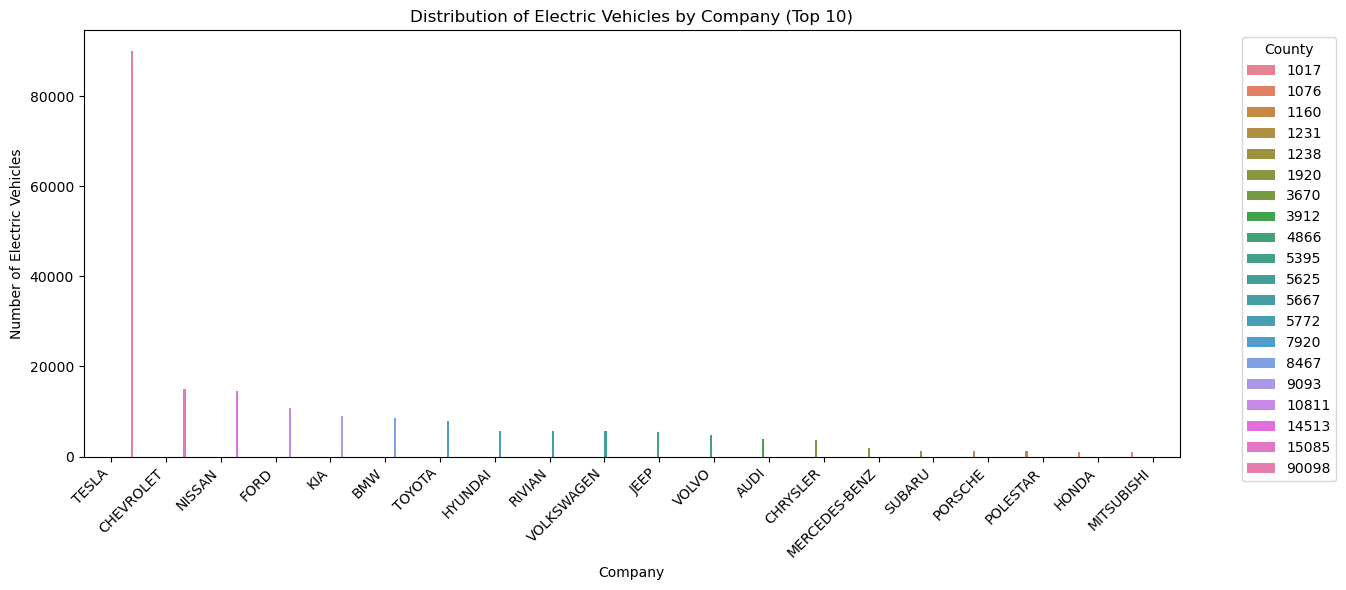

In [66]:
# Count the number of electric vehicles by Company
count_by_make = data['Make'].value_counts().head(20)
colors = sns.color_palette("husl", len(count_by_make))

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=count_by_make.index, y=count_by_make.values, hue=count_by_make.values, palette=colors)
plt.title('Distribution of Electric Vehicles by Company (Top 10)')
plt.xlabel('Company')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The above chart shows that:

- TESLA leads by a substantial margin with the highest number of vehicles registered.
- NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.
- FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.

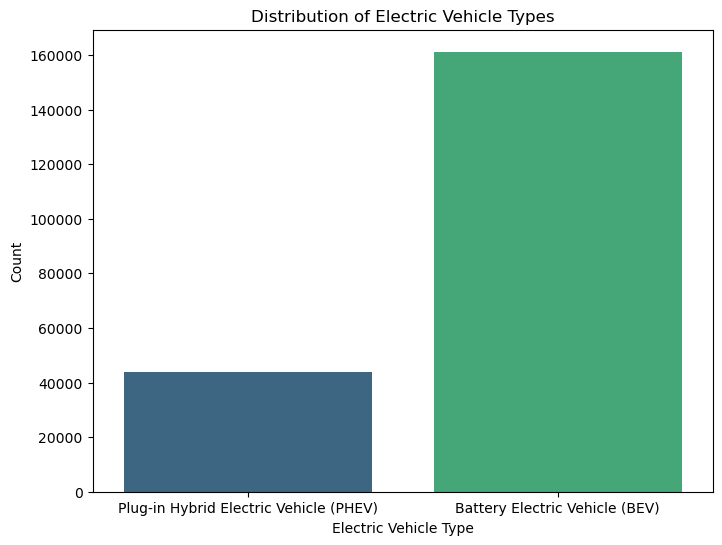

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Electric Vehicle Type', palette='viridis')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks()
plt.show()

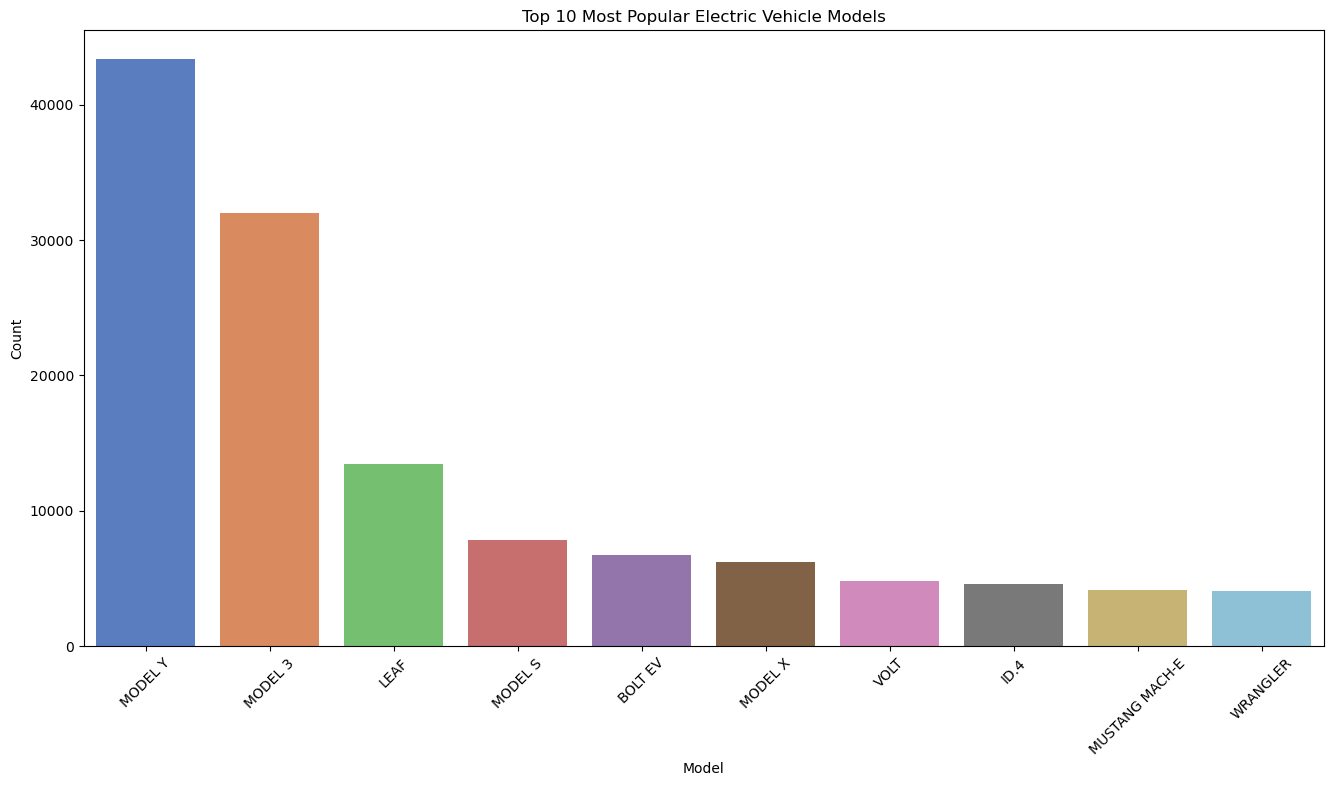

In [68]:
plt.figure(figsize=(16, 8))
sns.countplot(data=data, x='Model', palette='muted', order=data['Model'].value_counts().index[:10])
plt.title('Top 10 Most Popular Electric Vehicle Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:

- TESLA's MODEL Y and TESLA MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
- NISSAN's LEAF is the third most registered model and the most registered non-TESLA vehicle.
- TESLA’s MODEL S and MODEL X also have a significant number of registrations.
- CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
- NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

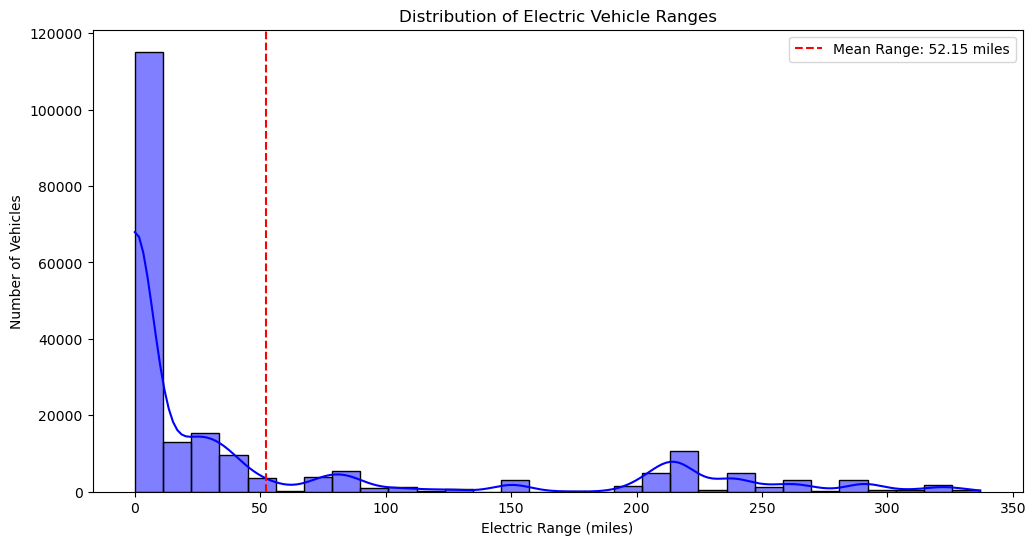

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Electric Range'], bins=30, kde=True, color='blue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The above graph shows the mean electric range. Key observations from the graph include:

- There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
- The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
- The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.
- Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

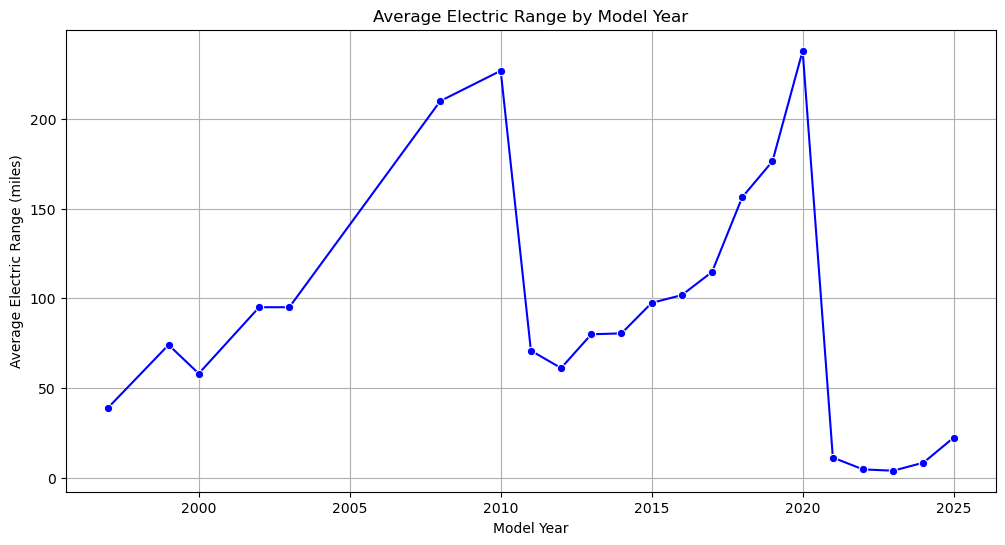

In [70]:
average_range_by_year = data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='blue')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

- There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
- There is a noticeable peak around the year 2020 when the average range reaches its highest point.
- Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
- After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

# Estimated Growth:

## Estimated Market Size Analysis of Electric Vehicles in the United States

Now, we can calculate the compound annual growth rate (CAGR) of electric vehicle registrations over a certain period to estimate the growth in the market size. It will provide insights into the pace of market expansion and help forecast future market size.

We use the formula to calculate the compound annual growth rate (CAGR):

CAGR = ((EV(initial) / EV(final))n/1 )−1

Where:

EV(initial): is the number of electric vehicles at the beginning of the period.

EV(final): is the number of electric vehicles at the end of the period.

𝑛: is the number of years in the period.

In [71]:
data_copy = data.copy()

# Convert 'Model Year' to datetime and extract the year
data_copy['Model Year'] = pd.to_datetime(data_copy['Model Year'], format='%Y')
data_copy['Year'] = data_copy['Model Year'].dt.year

registrations = data_copy['Year'].value_counts().sort_index()

initial = registrations.min()
final = registrations.max()

n_years = len(registrations)

# Calculate CAGR
cagr = ((final / initial) ** (1 / n_years)) - 1

print("Compound Annual Growth Rate (CAGR): {:.2%}".format(cagr))

Compound Annual Growth Rate (CAGR): 64.90%


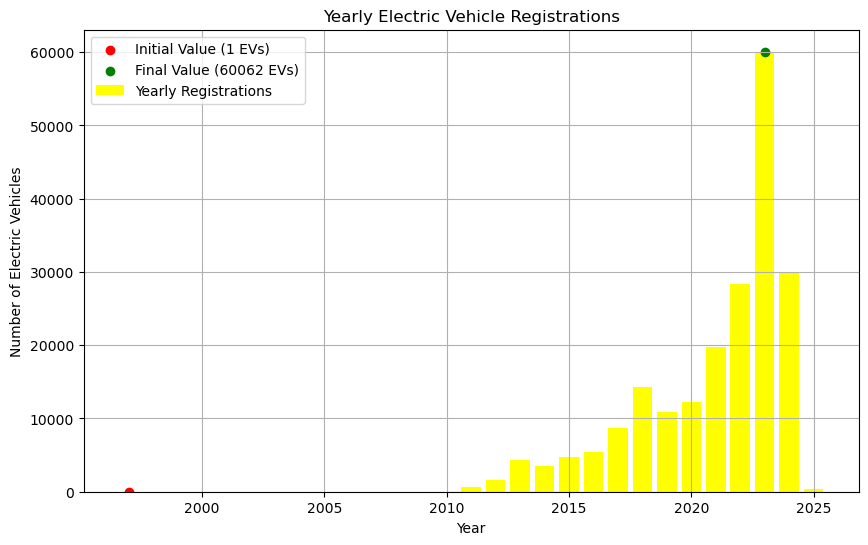

In [72]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(registrations.index, registrations.values, color='yellow', label='Yearly Registrations')
plt.scatter(registrations.idxmin(), initial, color='red', label='Initial Value ({} EVs)'.format(initial))
plt.scatter(registrations.idxmax(), final, color='green', label='Final Value ({} EVs)'.format(final))
plt.title('Yearly Electric Vehicle Registrations')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.legend()
plt.grid(True)
plt.show()

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years.

In [73]:
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = registrations[registrations.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

forecasted_evs

{2024: 84099.60239781695,
 2025: 129089.30173223234,
 2026: 198146.57081123002,
 2027: 304146.5326514074,
 2028: 466851.95179078367,
 2029: 716597.8286547337}

Now, let’s plot the estimated market size data:

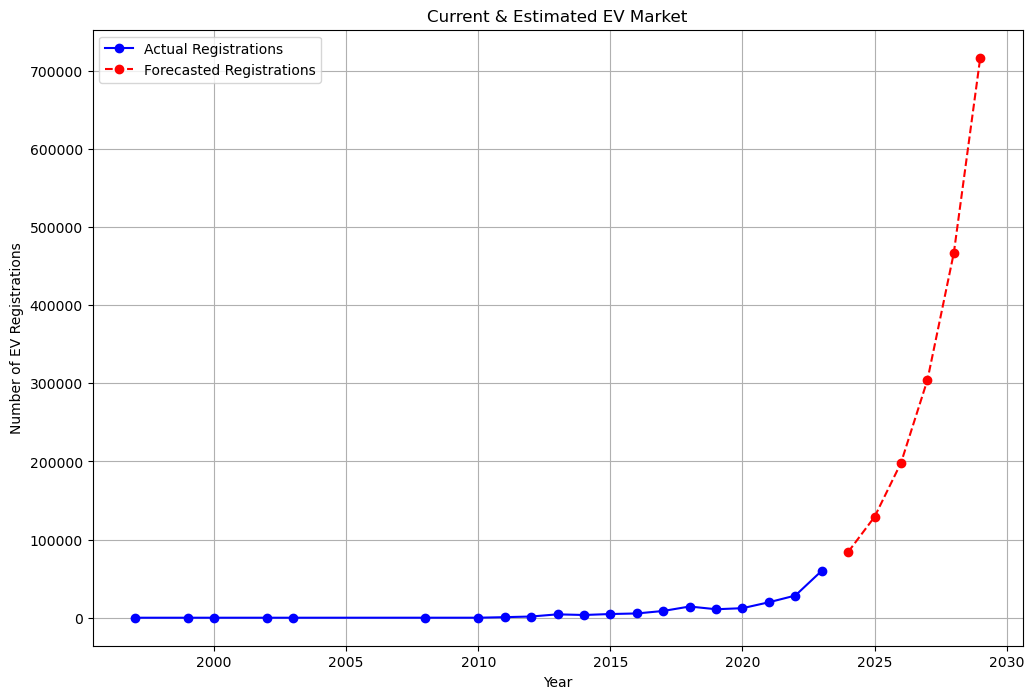

In [74]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()

From the above graph, we can see:

- The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
- The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.

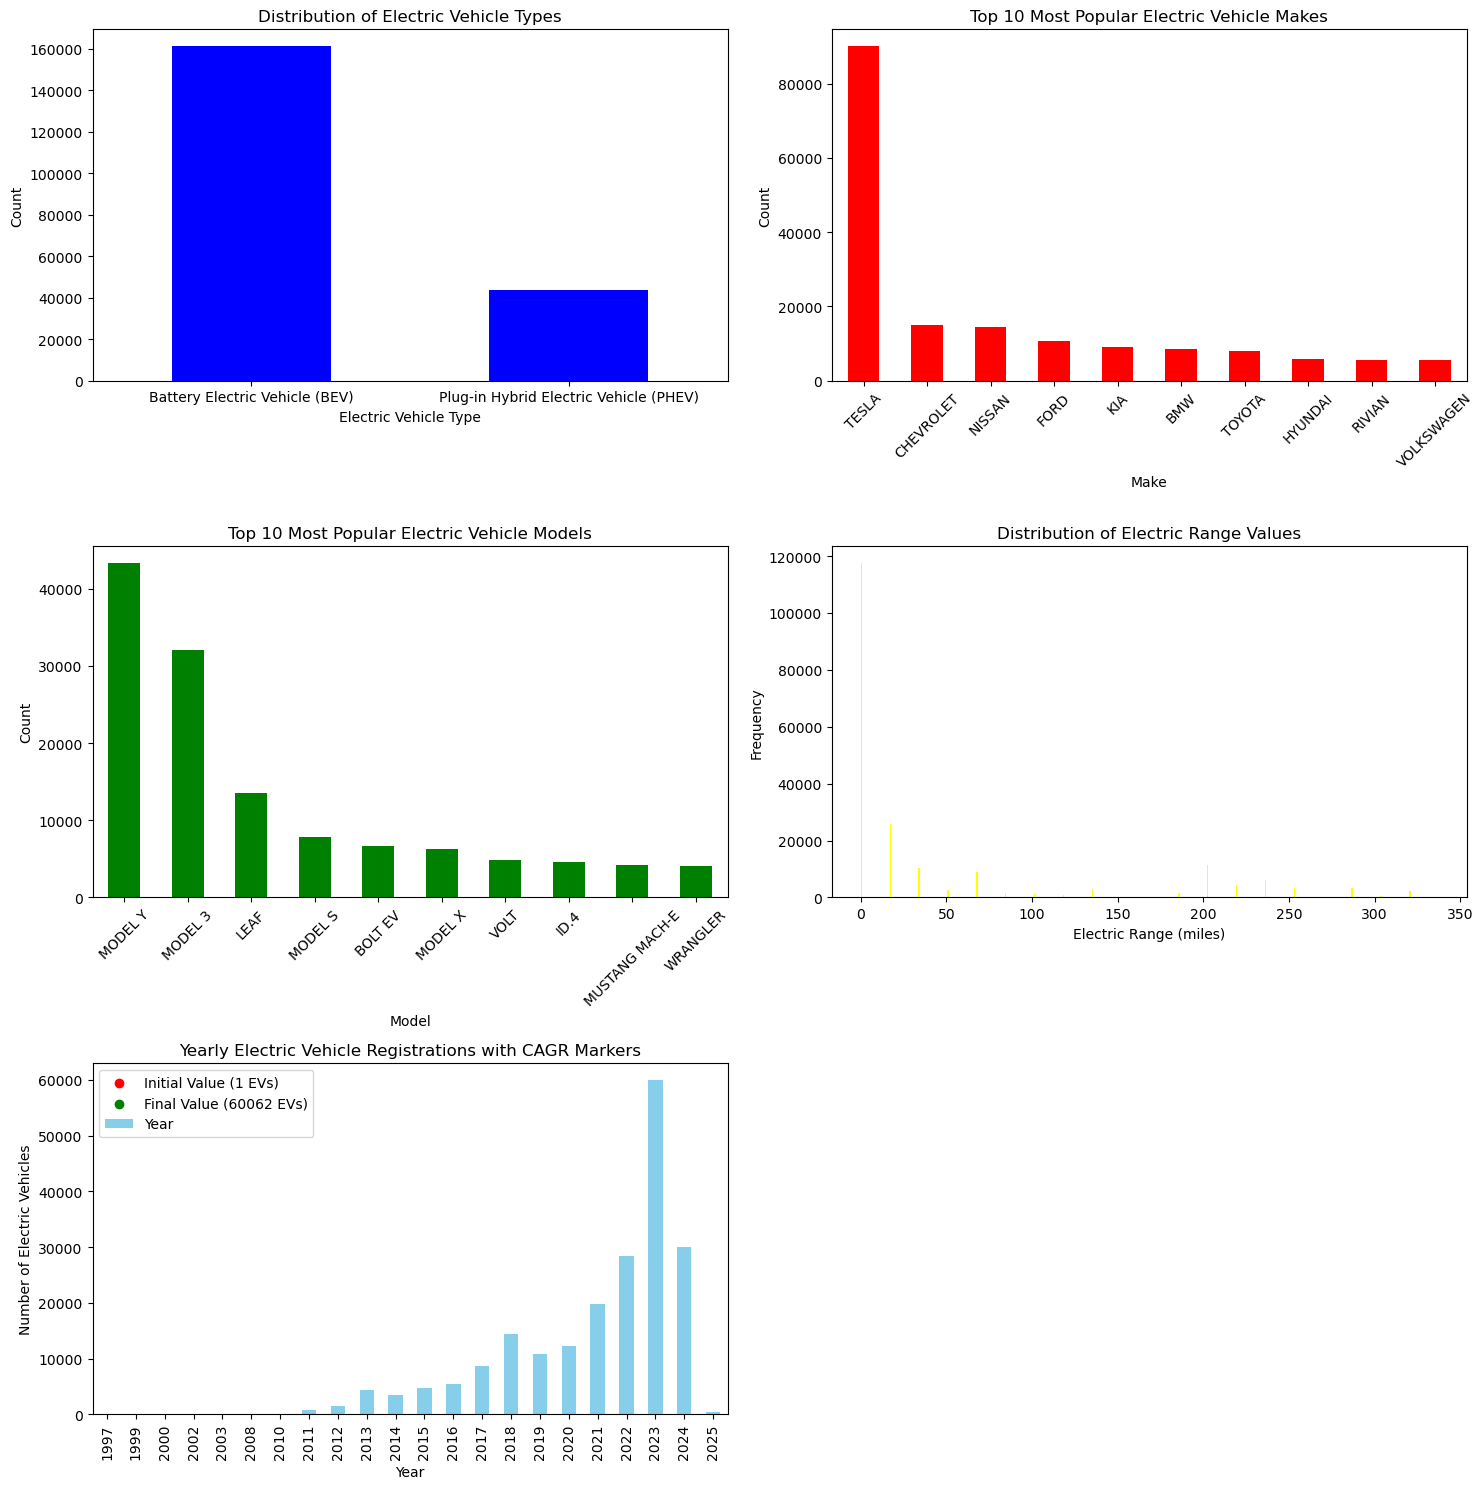

In [75]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Distribution of Electric Vehicle Types
data['Electric Vehicle Type'].value_counts().plot(kind='bar', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Electric Vehicle Types')
axes[0, 0].set_xlabel('Electric Vehicle Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=360)

# Top 10 Most Popular Electric Vehicle Makes
data['Make'].value_counts().head(10).plot(kind='bar', ax=axes[0, 1], color='red')
axes[0, 1].set_title('Top 10 Most Popular Electric Vehicle Makes')
axes[0, 1].set_xlabel('Make')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

#Top 10 Most Popular Electric Vehicle Models
data['Model'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Top 10 Most Popular Electric Vehicle Models')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Distribution of Electric Range Values
data['Electric Range'].plot(kind='hist', ax=axes[1, 1], bins=20, color='yellow', edgecolor='none', width=0.8)
axes[1, 1].set_title('Distribution of Electric Range Values')
axes[1, 1].set_xlabel('Electric Range (miles)')
axes[1, 1].set_ylabel('Frequency')

#early Electric Vehicle Registrations with CAGR Markers
registrations.plot(kind='bar', ax=axes[2, 0], color='skyblue')
axes[2, 0].scatter(registrations.idxmin(), initial, color='red', label='Initial Value ({} EVs)'.format(initial))
axes[2, 0].scatter(registrations.idxmax(), final, color='green', label='Final Value ({} EVs)'.format(final))
axes[2, 0].legend()
axes[2, 0].set_title('Yearly Electric Vehicle Registrations with CAGR Markers')
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Number of Electric Vehicles')

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

# Conclusion
So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.